# Basics of Game Theory and ESS

## Basic notions

In [159]:
import numpy as np

game_matrix = np.array([[(2,2),(0,3)],
                        
                        [(1,1),(3,0)]])

def play(s1,s2):
    payoff = {'cc':(20,20), 'cd':(0,30), 'dd':(10,10), 'dc': (30,0)}
    return payoff[str(s1)+str(s2)]

print (play('c','c'))

(20, 20)


In [160]:
import random
def next_move(my_moves,other_moves,strat_name):
    """according to the list of my moves and the moves of the other
    I choose a move """
    #
    # basic strategies
    #
    if strat_name == 'defect':
        return 'd'
    
    elif strat_name=='cooperate':
        return 'c'
    
    elif strat_name=='titfortat':
        if other_moves == []:
            return 'c'
        else:
            return other_moves[-1]
        
    elif strat_name == 'random':
        return random.choice(['d','c'])
    elif strat_name=='alternate':
            if my_moves == []:
                return 'd'
            elif my_moves[-1] == 'c':
                return 'd'
            else:
                # Always start with a 'c'
                return 'c'
    elif strat_name == 'punish':
        if "d" in other_moves:
            return "d"
        else:
            return "c"
    #    
    # propose your own strategies below
    #
    elif strat_name == "our_strat":
        # if on the last 3 moves, there's more or equal 2 defect, we defect
        if (other_moves[-1:-4:-1]).count("c") >= 2:
            return 'd'
        else:
            return 'c'
    else:
        print("Strat name unknown")
        return None


In [161]:
print(next_move([], ["c", "d", 'c', "c", ], "our_strat"))

d


## Repeated 2-player match 

In [162]:
    
nb_iterations=10

strategies = {'R': 'titfortat', 'B': 'defect'}
def run(nb_game:int, strategies:dict):
    """
    Run a 1v1 match, the dictionnary must be written like {'R': 'titfortat', 'B': 'defect'}.
    Return the score at the end of each opponant (R, B)
    """
    to_plot = {'R':[0], 'B':[0]}
    moves_played = {'R': [], 'B': []}
    cumulated_payoff = {'R': 0, 'B': 0}
    for i in range(nb_iterations):
        moveR = next_move(moves_played['R'],moves_played['B'],strategies['R'])
        moveB = next_move(moves_played['B'],moves_played['R'],strategies['B'])
        payoffR,payoffB = play(moveR,moveB)
        cumulated_payoff['R'] += payoffR
        cumulated_payoff['B'] += payoffB
        moves_played['R'] += moveR
        moves_played['B'] += moveB
        #print ("R joue ",coupR, ", B joue", coupB, "--> gains:", gainR, gainB)
        to_plot['R'].append(cumulated_payoff['R'])
        to_plot['B'].append(cumulated_payoff['B'])
        return (cumulated_payoff["R"], cumulated_payoff['B'])
    

    



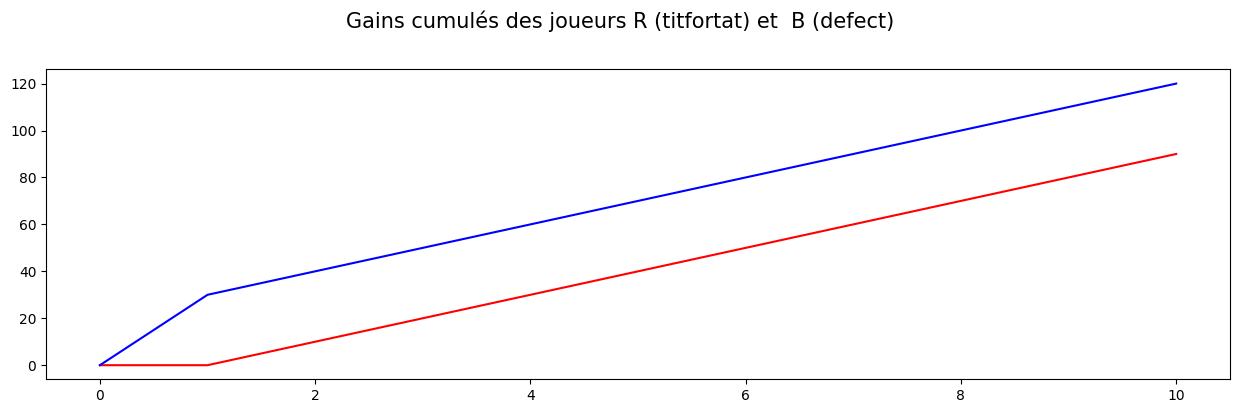

In [163]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from IPython.core.pylabtools import figsize
import networkx as nx
import pylab
figsize(12.5, 4)
p = np.linspace(0, nb_iterations, nb_iterations+1)
plt.plot(p, to_plot['R'], color='red')
plt.plot(p, to_plot['B'], color = 'blue')
legende = "Gains cumulés des joueurs R (" + strategies['R'] + ") et  B (" + strategies['B']+")"
plt.suptitle(legende, y=1.02, fontsize=15)
plt.tight_layout()

## Axelrod Tournament

Based on the previous code, reproduce an Axelrod tournament. 
* several strategies may compete (you can fix an upper bound)
* each strategy must play against any other strategy
* each pairwise confrontation is a 200 iteration game

At the end of the tournament, give the histogram of the cumulated scores of the different strategies. 

In [164]:
nb_iterations = 200
type_strat = ["defect", "cooperate", "titfortat", "random", "alternate", "punish", "our_strat"]
lscore = []
for i in range(0, (len(type_strat))):
    strat1 = type_strat[i]
    souslscore = []
    for j in range(0, len(type_strat)):
        strat2 = type_strat[j]
        score = run(200, {"R" : strat1, "B" : strat2})
        souslscore.append(score)
    lscore.append(souslscore)
print(lscore)

[[(10, 10), (30, 0), (30, 0), (10, 10), (10, 10), (30, 0), (30, 0)], [(0, 30), (20, 20), (20, 20), (0, 30), (0, 30), (20, 20), (20, 20)], [(0, 30), (20, 20), (20, 20), (20, 20), (0, 30), (20, 20), (20, 20)], [(10, 10), (20, 20), (30, 0), (0, 30), (10, 10), (20, 20), (30, 0)], [(10, 10), (30, 0), (30, 0), (30, 0), (10, 10), (30, 0), (30, 0)], [(0, 30), (20, 20), (20, 20), (0, 30), (0, 30), (20, 20), (20, 20)], [(0, 30), (20, 20), (20, 20), (0, 30), (0, 30), (20, 20), (20, 20)]]


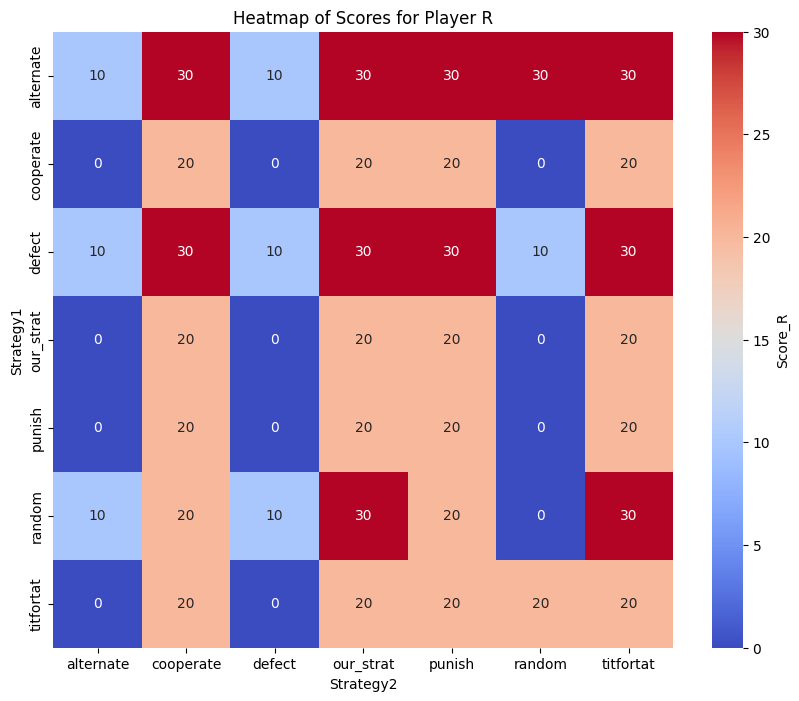

In [165]:
import seaborn as sns
import pandas as pd

# Create a DataFrame from the lscore list
heatmap_data = []
for i, row in enumerate(lscore):
    for j, score in enumerate(row):
        heatmap_data.append([type_strat[i], type_strat[j], score[0], score[1]])

df_heatmap = pd.DataFrame(heatmap_data, columns=['Strategy1', 'Strategy2', 'Score_R', 'Score_B'])

# Pivot the DataFrame to get the scores in matrix form
heatmap_matrix_R = df_heatmap.pivot(index='Strategy1', columns='Strategy2', values='Score_R')
heatmap_matrix_B = df_heatmap.pivot(index='Strategy1', columns='Strategy2', values='Score_B')

# Plot the heatmap for Score_R
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_matrix_R, annot=True, cmap='coolwarm', cbar_kws={'label': 'Score_R'})
plt.title('Heatmap of Scores for Player R')
plt.show()

/tmp/ipykernel_1389/4021341914.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Strategy', y='Total_Score', data=df_total_scores, palette='viridis')


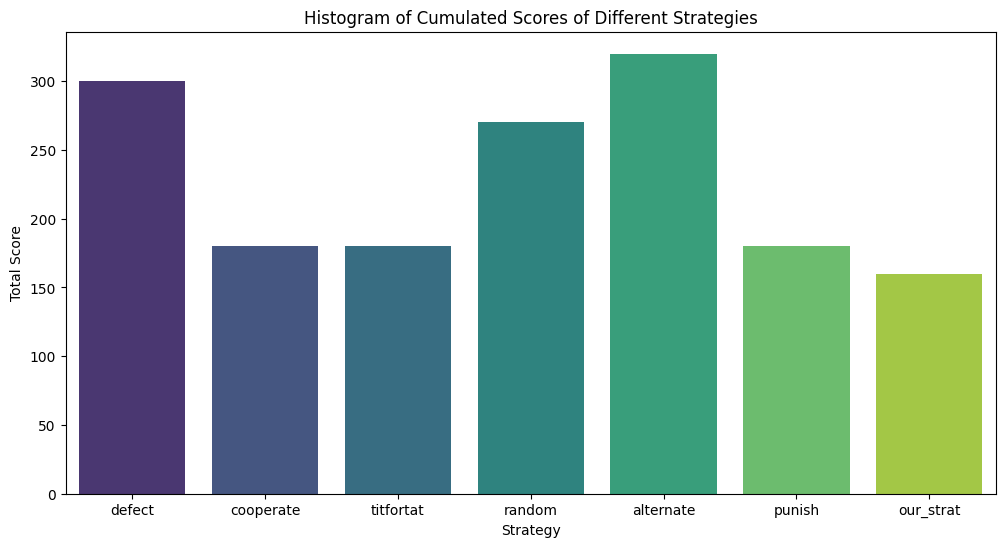

In [166]:
# Calculate the total scores for each strategy
total_scores = {strategy: 0 for strategy in type_strat}
for i, row in enumerate(lscore):
    for j, score in enumerate(row):
        total_scores[type_strat[i]] += score[0]  # Add Score_R
        total_scores[type_strat[j]] += score[1]  # Add Score_B

# Create a DataFrame for plotting
df_total_scores = pd.DataFrame(list(total_scores.items()), columns=['Strategy', 'Total_Score'])

# Plot the histogram
plt.figure(figsize=(12, 6))
sns.barplot(x='Strategy', y='Total_Score', data=df_total_scores, palette='viridis')
plt.title('Histogram of Cumulated Scores of Different Strategies')
plt.xlabel('Strategy')
plt.ylabel('Total Score')
plt.show()

## Evolutionary stable strategies (ESS)

In the evolutionary setting, we have a population of agents. Each agent plays a fixed strategy. An initial propotion is given. Agents meet randomly in a pairwise manner. Then the population evolves depending on the result of the previous interaction. 

On the basis of the previous code, run a simulation showing the evolution of the proportion of agents playing each strategy. 

In [167]:
def play2(s1,s2):
    payoff2 = {'ss':(4,4), 'st':(0,4), 'tt':(3,3), 'ts': (4,0)}
    return payoff2[str(s1)+str(s2)]
    

Show that the strategy (s,s) in the modified stag hunt game recalled below is **not** ESS.

In [177]:
givenProp = 0.7
lPopulation = ['s'] * int(givenProp * 100) + ['t'] * int((1 - givenProp) * 100)
print(lPopulation)
player0, player1 = 1, 1
while lPopulation.count("s") not in (len(lPopulation), 0):
    player0, player1 = random.randint(0, len(lPopulation) - 1), random.randint(0, len(lPopulation) - 1)
    while player0 == player1:
        player0, player1 = random.randint(0, len(lPopulation) - 1), random.randint(0, len(lPopulation) - 1)
    print(player0, player1)
    score = play2(lPopulation[player0], lPopulation[player1])
    if score[0] > score[1]:
        del lPopulation[player1]
    else:
        del lPopulation[player0]
print(lPopulation)

['s', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't']
14 47
40 64
68 84
66 35
39 23
82 90
90 56
38 32
71 81
26 74
63 88
73 36
32 18
82 71
64 83
59 64
7 21
79 2
71 22
43 48
45 54
63 51
11 38
71 75
2 37
65 70
8 20
43 22
7 47
53 19
39 6
61 66
61 17
15 35
63 1
39 48
63 16
11 61
28 48
14 32
30 1
39 17
55 43
27 21
14 1
8 28
36 34
45 39
44 16
38 46
19 15
34 44
11 34
39 20
28 19
37 29
24 17
26 20
14 11
35 16
15 35
14 37
20 14
3 27
15 27
27 23
33 31
5 2
10 12
28 26
11 21
3 13
3 5
24 20
16 13
0 2
17 0
12 17
0 14
0 2
16 11
2 9
1 5
12 4
12 14
14 9
11 8
6 0
0 